# Práctica 1 (impacto de las restricciones de tráfico en la calidad del aire)


Objetivo: 
El 30 de diciembre de 2016 el Ayuntamiento de Madrid empieza a restringir el tráfico al centro de la ciudad
mediante la aplicación del escenario 3 del protocolo de contaminación. Esta fue la primera vez que se aplicó
un escenario tan restrictivo. Demuestra mediante visualizaciones de datos que ha ocurrido después de ello.
Para dicho problema, haremos uso de un dataset con datos sobre la calidad del aire en Madrid desde 2001. El
dataset contiene un archivo csv por año. Dentro de cada uno de ellos habrá medidas diarias de distintas
estaciones. Estas estaciones miden diferentes parámetros y no siempre todos se registran en cada una de las
estaciones.
https://www.kaggle.com/decide-soluciones/air-quality-madrid/downloads/csvs_per_year.zip/5

Importación de librerías

In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1.- (1 punto) Lo primero que tendremos que hacer es cargar todos los archivos csv en un mismo DataFrame
para poder manipularlos. Habrá que comprobar si existen datos redundantes o anómalos.
Para medir la calidad del aire de un día obtendremos el valor de cada estación meteorológica ese día y
después calcularemos la media de estos. El primer valor se estimará teniendo en cuenta la tabla que se
encuentra más abajo. Después habrá que hacer una transformación de valores continuos a categóricos.
Proporcionar dicha información en un DataFrame y luego guardarlo en un archivo csv.
La calidad del aire general es igual al peor índice de las cinco partículas que se muestran en la tabla siguente.

Muestro la estructura del dataframe:

In [2]:
# Ruta de los archivos CSV
csv_path = "./csvs_per_year/"

# Obtener la lista de archivos CSV ordenados
csv_files = sorted(glob.glob(os.path.join(csv_path, "madrid_*.csv")))

# Verificar que se encontraron archivos
if not csv_files: #si es falso
    raise FileNotFoundError("No se encontraron los archivos CSV en la ruta ./csvs_per_year/")

# Cargar los archivos en un único DataFrame
df_list = [pd.read_csv(file, sep=",", encoding="latin1", low_memory=False) for file in csv_files]

# Unir todos los DataFrames en uno solo
df = pd.concat(df_list, ignore_index=True)


# Mostrar las primeras filas
df.head()

# Ver columnas y tipos de datos
df.info()

# Resumen estadístico de los datos numéricos
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 19 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   BEN      float64
 2   CO       float64
 3   EBE      float64
 4   MXY      float64
 5   NMHC     float64
 6   NO_2     float64
 7   NOx      float64
 8   OXY      float64
 9   O_3      float64
 10  PM10     float64
 11  PXY      float64
 12  SO_2     float64
 13  TCH      float64
 14  TOL      float64
 15  station  int64  
 16  PM25     float64
 17  NO       float64
 18  CH4      float64
dtypes: float64(17), int64(1), object(1)
memory usage: 552.0+ MB


,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
count,1.041684e+06,2.651012e+06,1.001724e+06,315415.000000,1.085312e+06,3.787050e+06,2.376275e+06,315695.000000,2.991732e+06,2.861255e+06,315584.000000,2.775960e+06,1.086441e+06,1.038929e+06,3.808224e+06,816424.000000,1.532397e+06,14850.000000
mean,1.257431e+00,5.503838e-01,1.407927e+00,4.650394,1.873865e-01,5.047151e+01,1.093188e+02,2.280912,3.982616e+01,2.893654e+01,2.056178,1.065539e+01,1.435882e+00,5.876842e+00,2.807903e+07,13.738292,2.343886e+01,1.300849
std,1.910831e+00,5.354483e-01,2.146109e+00,5.599223,1.539529e-01,3.455288e+01,1.102871e+02,2.639609,3.039249e+01,2.594859e+01,2.395130,9.121267e+00,2.332228e-01,8.524460e+00,2.028574e+01,11.214146,5.021504e+01,0.195550
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.807900e+07,-31.000000,0.000000e+00,0.020000
25%,2.100000e-01,2.600000e-01,3.500000e-01,1.200000,9.000000e-02,2.400000e+01,4.000000e+01,0.960000,1.271000e+01,1.150000e+01,0.800000,5.840000e+00,1.300000e+00,1.100000e+00,2.807901e+07,6.450000,2.000000e+00,1.170000
50%,6.000000e-01,4.000000e-01,8.800000e-01,2.800000,1.500000e-01,4.400000e+01,7.615000e+01,1.320000,3.486000e+01,2.149000e+01,1.280000,8.150000e+00,1.380000e+00,3.160000e+00,2.807902e+07,11.000000,6.000000e+00,1.250000
75%,1.500000e+00,6.500000e-01,1.580000e+00,5.890000,2.400000e-01,6.958000e+01,1.397000e+02,2.740000,5.999000e+01,3.775000e+01,2.510000,1.230000e+01,1.510000e+00,6.990000e+00,2.807904e+07,17.670000,2.000000e+01,1.400000
max,6.639000e+01,1.804000e+01,1.622000e+02,177.600006,9.070000e+00,6.286000e+02,2.537000e+03,103.000000,2.360000e+02,6.950000e+02,106.000000,1.991000e+02,1.048000e+01,2.429000e+02,2.807910e+07,506.899994,1.146000e+03,3.920000


In [3]:
#Convierto "date" a formato fecha
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.dtypes

date       datetime64[ns]
BEN               float64
CO                float64
EBE               float64
MXY               float64
NMHC              float64
NO_2              float64
NOx               float64
OXY               float64
O_3               float64
PM10              float64
PXY               float64
SO_2              float64
TCH               float64
TOL               float64
station             int64
PM25              float64
NO                float64
CH4               float64
dtype: object

### Tratamiento de datos

#### Tratamiento de nulos

Ahora vamos a eliminar las filas que tienen nulos o valores duplicados, todos los valores clave (las necesarias para calcular la contaminación del aire).

Para ello, primero empezaremos definiendo los valores clave en "key_columns".

Depués vamos a hacer lo que hemos comentado previamente de eliminar las filas que no nos van a ser de utilidad (con todos los valores críticos nulos)

*De esta manera, haremos un tratamiento de los valores nulos eficiente, eliminando sobrecarga de información inútil*

In [4]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)

key_columns = ["PM10", "PM25", "NO_2", "O_3", "SO_2"] # Columnas clave (los contaminantes)

# Eliminar filas donde todas las columnas clave sean nulas
df = df.dropna(subset=key_columns, how="all")

### Calcular calidad del aire en un dia

Lo que hemos interpretado es:
- Primero habrá que hacer la media de cada contaminante por estación por cada dia.
- Posteriormente, se realizará la media de las estaciones para calcular la media diaria.
- Para calcular la calidad del aire cada día, tomamos el peor índice de entre los 5 componentes, es decir, dado que puede ser que haya un valor bueno y otro malo por ejemplo, el peor valor de los 5 será el que defina la calidad del aire.


**Antes de empezar vamos a extraer el día de la columna date, para poder agrupar los datos por día.**

##### Paso 1: Calcular la media de cada contaminante por estación y día
Dado que hay múltiples estaciones meteorológicas midiendo los contaminantes, primero calculamos la media de cada contaminante en cada estación para cada día.

##### Paso 2: Seleccionar la calidad diaria
Después de obtener las medias por estación por día, la calidad diaria será la estación del día CON PERO CALIDAD. De esta manera, aplicaremos una media para cada estación y el filtro de elección que se pide (elegir el peor indice de los que se tienen) para la elección de la calidad diaria.

##### Paso 3: Definir los umbrales de calidad del aire
Para cada contaminante (PM10, PM25, NO_2, O_3, SO_2), utilizamos los umbrales dados en el enunciado.

##### Paso 4: Aplicar la función de clasificación
se aplicará la función de clasificación para cada fila de la tabla, y se le asignará un índice de calidad, para posteriormente aplicar una categorización a cada índice.



**Finalmente, tendremos como resultado todos los días, con sus contaminantes (mostrando el peor índice del cía) y su categoría**

In [5]:
# Extraer el dia de la columna 'date'
df['day'] = df['date'].dt.date


# Calcular la media de cada contaminante por estacion y dia
media_por_estacion = df.groupby(["day", "station"])[key_columns].mean().reset_index()

""" # Verificar los resultados tras calcular la media por estación
print("\nPrimeras filas de la media por estación y día:")
print(media_por_estacion.head())
print("\nCantidad de estaciones por día después de la agrupación:")
print(media_por_estacion.groupby("day").size().head(10)) """

# Función para determinar la categoría de calidad del aire basada en la media diaria
def calidad_diaria(row):
    categorias = { 
        "PM25": [15, 30, 55, 110],
        "PM10": [25, 50, 90, 180],
        "NO_2": [50, 100, 200, 400],
        "O_3": [60, 120, 180, 240],
        "SO_2": [50, 100, 350, 500],
    }

    peor_calidad = 0
    for col, umbral in categorias.items():
        value = row[col]
        if pd.isnull(value):  # Ignorar valores nulos
            continue
        if value <= umbral[0]:
            calidad = 1  # Muy Buena
        elif value <= umbral[1]:
            calidad = 2  # Buena
        elif value <= umbral[2]:
            calidad = 3  # Regular
        elif value <= umbral[3]:
            calidad = 4  # Mala
        else:
            calidad = 5  # Muy Mala

        peor_calidad = max(peor_calidad, calidad)  # Nos quedamos con la peor clasificación

    return peor_calidad


# Aplicar la función para calcular la calidad del aire de cada estación por día
media_por_estacion["Índice_Calidad_Estación"] = media_por_estacion.apply(calidad_diaria, axis=1)

# Seleccionar la estación con la peor calidad del aire cada día**
peor_estacion_diaria = media_por_estacion.loc[media_por_estacion.groupby("day")["Índice_Calidad_Estación"].idxmax()]


# Asignar etiquetas de calidad a cada categoria
valor_calidad = {
    1: "Muy Buena",
    2: "Buena",
    3: "Regular",
    4: "Mala",
    5: "Muy Mala",
}
peor_estacion_diaria["Categoría_Calidad_Aire"] = peor_estacion_diaria["Índice_Calidad_Estación"].map(valor_calidad)

# Mostrar las primeras filas del resultado
print(peor_estacion_diaria.head())

peor_estacion_diaria.to_csv("daily_air_quality.csv", index=False)
print(f"\nArchivo daily_air_quality.csv guardado con éxito.")

            day   station       PM10  PM25       NO_2        O_3       SO_2  \
1    2001-01-01  28079004  17.198261   NaN  57.817391  18.357826  16.983044   
38   2001-01-02  28079018  58.124166   NaN  78.623750  14.117083  21.313333   
64   2001-01-03  28079018  61.157083   NaN  74.532917  10.842917  22.837917   
90   2001-01-04  28079018  75.321250   NaN  70.089584  10.754783  22.647391   
116  2001-01-05  28079018  58.753750   NaN  52.784167   9.115000  22.244583   

     Índice_Calidad_Estación Categoría_Calidad_Aire  
1                          2                  Buena  
38                         3                Regular  
64                         3                Regular  
90                         3                Regular  
116                        3                Regular  

Archivo daily_air_quality.csv guardado con éxito.






2.- (0,5 puntos) Explica visualmente como se distribuyen las calidades del aire entre buena, admisible, mala y
muy mala. Realiza para ello un pie chart. Que se puede concluir de dicho gráfico.




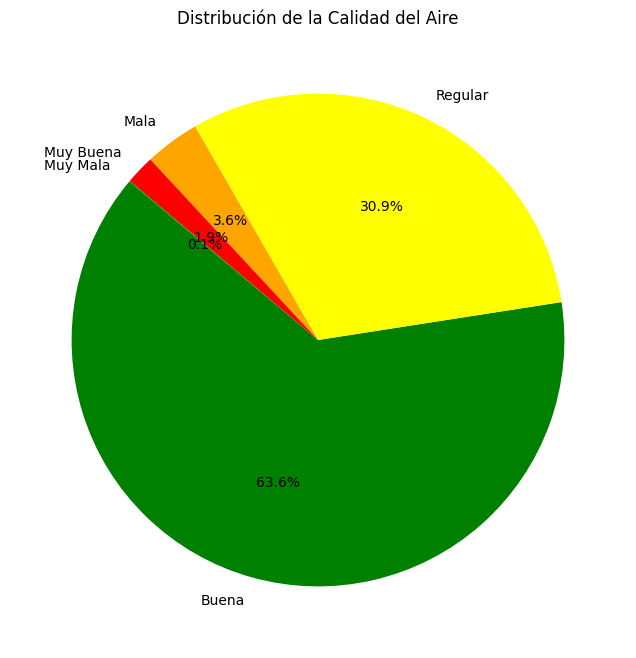

In [6]:
# Contar la cantidad de días para cada categoría de calidad del aire
air_quality_counts = peor_estacion_diaria['Categoría_Calidad_Aire'].value_counts()

# Crear pie chart
plt.figure(figsize=(8, 8))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'yellow', 'orange', 'red'])
plt.title('Distribución de la Calidad del Aire')
plt.show()

Con esto lo que interpretamos es: 

- **Muy Buena (color morado):** se ha dado el **1.9%** de los días desde el 2001-01-01 hasta el 2018-05-01
- **Buena (color verde):** se ha dado el **63.6%** de los días desde el 2001-01-01 hasta el 2018-05-01
- **regular (color amarillo):** se ha dado el **30.9%** de los días desde el 2001-01-01 hasta el 2018-05-01
- **Mala (color ranja)** se ha dado el **3.6%** de los días desde el 2001-01-01 hasta el 2018-05-01
- **Muy Mala (color morado):** se ha dado el **0.1%** de los días desde el 2001-01-01 hasta el 2018-05-01

3.- (1 punto) Una vez obtenida la calidad del aire para cada día, calcula la calidad media de cada mes para que
sea más fácil saber si la contaminación ha disminuido desde que se restringió el acceso al centro de Madrid.
Explica visualmente si los protocolos de restricciones de tráfico han tenido éxito. Utiliza para ello un diagrama
de barras. ¿Podemos encontrar la diferencia entre lo que ocurría antes de aplicar el protocolo y después?


## Calidad Media de Cada Mes

Una vez obtenida la calidad del aire para cada día, queremos calcular la calidad media de cada mes. Esto nos permitirá analizar si la contaminación ha disminuido tras las restricciones de tráfico en Madrid.

- Primero vamos a agrupar los datos por mes, extrayendo el año y el mes.
- Después, calcularemos la media del índice por cada mes para mostrarlo visualmente
- Finalmente generaremos una tabla con los valores mensuales promedio

Para ver mejor el impacto de las restricciones, vamos a calcular las medias tanto del indice (utilizado para calcular la calidad), como de las 5 componentes clave.

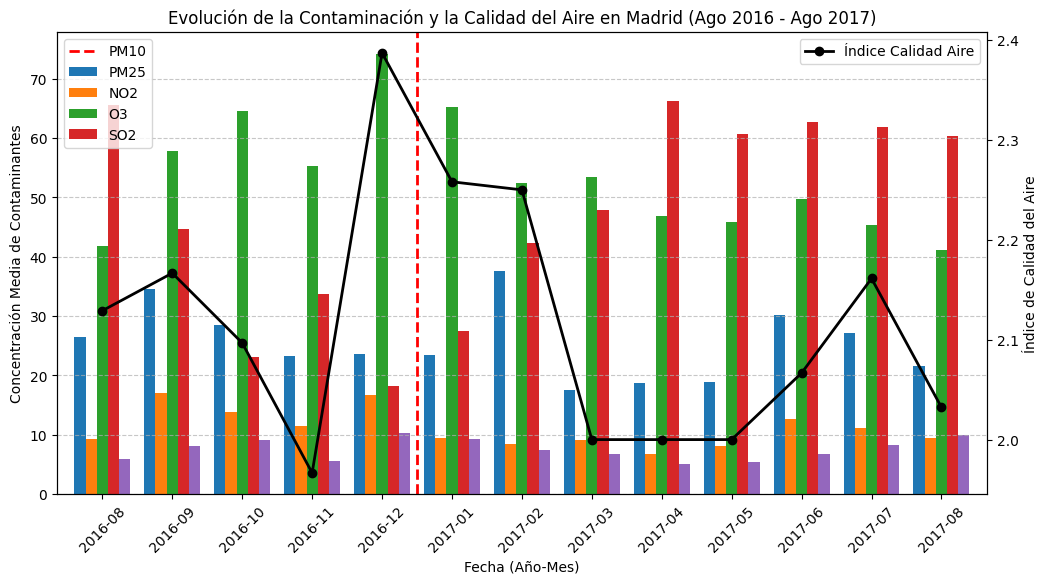

In [8]:
# Calcular la media mensual de las cinco componentes y del índice de calidad del aire
peor_estacion_diaria["mes"] = peor_estacion_diaria["day"].dt.to_period("M")

# Agrupar por mes y calcular la media
media_mensual = peor_estacion_diaria.groupby("mes")[["PM10", "PM25", "NO_2", "O_3", "SO_2", "Índice_Calidad_Estación"]].mean().reset_index()

# Convertir la columna 'mes' a string para facilitar el filtrado y la visualización
media_mensual["mes"] = media_mensual["mes"].astype(str)
# Filtrar el rango de fechas desde agosto de 2016 hasta agosto de 2017
media_mensual_filtrada = media_mensual.loc[(media_mensual["mes"] >= "2016-08") & (media_mensual["mes"] <= "2017-08")]

# Gráfico de barras - Evolución de la contaminación y calidad del aire
fig, ax1 = plt.subplots(figsize=(12, 6))

# Dibujar barras para los contaminantes
media_mensual_filtrada[['PM10', 'PM25', 'NO_2', 'O_3', 'SO_2']].plot(kind='bar', width=0.8, ax=ax1)

# Agregar la calidad media mensual como una línea sobre las barras
ax2 = ax1.twinx()  # Crear segundo eje Y para la calidad del aire
ax2.plot(media_mensual_filtrada["mes"], media_mensual_filtrada["Índice_Calidad_Estación"], color='black', marker='o', linestyle='-', linewidth=2, label='Índice Calidad Aire')

# Línea de referencia para la restricción de tráfico en diciembre de 2016
ax1.axvline(x=4.5, color='red', linestyle='--', linewidth=2, label='Restricción tráfico')

# Personalización del gráfico
ax1.set_xticks(range(len(media_mensual_filtrada.index)))
ax1.set_xticklabels(media_mensual_filtrada["mes"], rotation=45)
ax1.set_xlabel("Fecha (Año-Mes)")
ax1.set_ylabel("Concentración Media de Contaminantes")
ax2.set_ylabel("Índice de Calidad del Aire")
ax1.set_title("Evolución de la Contaminación y la Calidad del Aire en Madrid (Ago 2016 - Ago 2017)")

# Leyenda de la gráfica
ax1.legend(["PM10", "PM25", "NO2", "O3", "SO2"], loc="upper left")
ax2.legend(loc="upper right")

ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()


#### Gráfico de Líneas - Evolución Temporal de Contaminantes y Calidad del Aire

Este gráfico de líneas permite visualizar de manera más clara cómo evolucionaron los contaminantes y la calidad del aire en el tiempo. 

Es una derivación del gráfico de barras

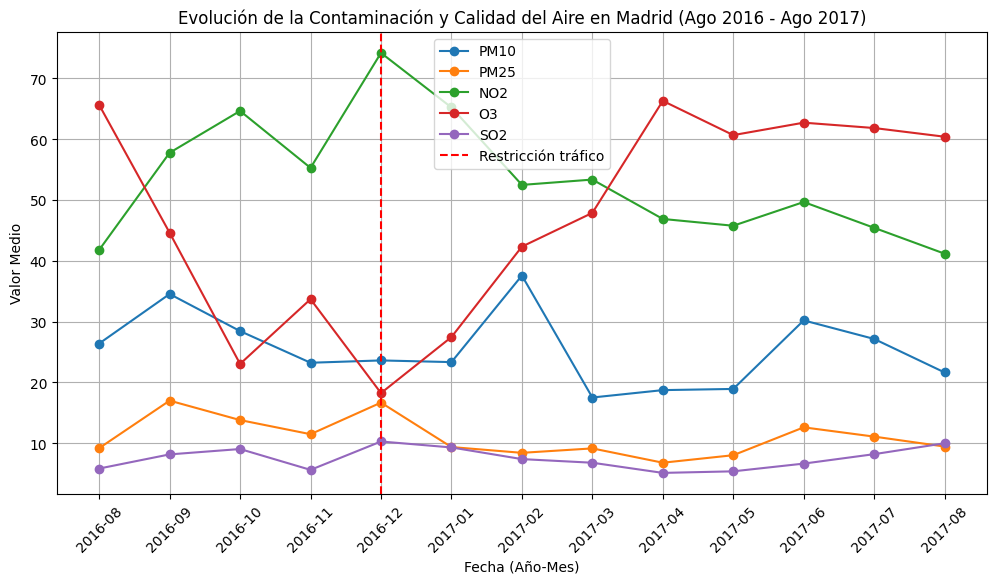

In [9]:
# Gráfico de líneas - Evolución de la contaminación y calidad del aire
plt.figure(figsize=(12,6))
plt.plot(media_mensual_filtrada["mes"], media_mensual_filtrada["PM10"], marker='o', linestyle='-', label='PM10')
plt.plot(media_mensual_filtrada["mes"], media_mensual_filtrada["PM25"], marker='o', linestyle='-', label='PM25')
plt.plot(media_mensual_filtrada["mes"], media_mensual_filtrada["NO_2"], marker='o', linestyle='-', label='NO2')
plt.plot(media_mensual_filtrada["mes"], media_mensual_filtrada["O_3"], marker='o', linestyle='-', label='O3')
plt.plot(media_mensual_filtrada["mes"], media_mensual_filtrada["SO_2"], marker='o', linestyle='-', label='SO2')

# Línea de referencia para la restricción de tráfico en diciembre de 2016
plt.axvline(x="2016-12", color='red', linestyle='--', label='Restricción tráfico')

plt.xticks(rotation=45)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Valor Medio")
plt.title("Evolución de la Contaminación y Calidad del Aire en Madrid (Ago 2016 - Ago 2017)")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

### Efecto de la restricción de tráfico (línea roja en diciembre de 2016)

**PM10 y NO_2:**
Estos contaminantes disminuyen levemente en los meses posteriores a la restricción, aunque hay meses que dan "picos de contaminación".
Sin embargo, los niveles permanecen relativamente altos, especialmente para NO_2, lo que indica que las restricciones no tuvieron un impacto significativo en reducir este contaminante a niveles bajos de forma consistente.

**O_3 (Ozono):**
Hay un aumento notable en los niveles de ozono tras la restricción (enero y febrero de 2017).

**PM25 y SO_2:**
Estos contaminantes muestran valores bastante bajos durante todo el período analizado, lo que indica que no fueron significativamente afectados por las restricciones o que ya estaban en niveles controlados antes de la medida.



### Conclusiones sobre la eficacia de las restricciones

Aunque hay una ligera reducción en algunos contaminantes como PM10 tras las restricciones, NO_2 sigue siendo un problema significativo.
Esto nos hace pensar que las restricciones no fueron lo suficientemente eficientes como para reducir los contaminantes en Madrid.

4,- (1 punto) Por último, queremos tratar de entender los cambios de la calidad del aire en estos últimos años.
Obtén un diagrama de cajas donde cada caja corresponda a un año y haz una interpretación de los resultados



El gráfico muestra la evolución de la calidad del aire en Madrid entre 2001 y 2018, permitiendo analizar su variabilidad y posibles cambios en la contaminación.

### Elementos Clave del Boxplot
- **Caja (rectángulo azul):** Representa el 50% central de los datos.  
- **Línea dentro de la caja:** Indica la mediana, es decir, el valor central de la distribución.  
- **Bigotes (líneas verticales):** Muestran la dispersión normal de los datos.  
- **Puntos fuera de los bigotes:** Son valores atípicos (outliers), indicando días con contaminación extrema.

### Observaciones Principales
- **Alta variabilidad entre 2001-2006**, con valores atípicos frecuentes y niveles elevados de contaminación.  
- **Desde 2007, la variabilidad se reduce**, lo que sugiere mayor estabilidad en la calidad del aire.  
- **A partir de 2016-2017, la contaminación parece disminuir**, con una mediana más baja y menor dispersión.  
- **Los valores atípicos reflejan episodios de alta contaminación**, posiblemente relacionados con condiciones meteorológicas o eventos específicos.

### Conclusión
La calidad del aire ha mostrado una tendencia a la mejora en los últimos años.La disminución de la variabilidad y la menor presencia de valores extremos pueden indicar el impacto de políticas ambientales y restricciones de tráfico.  


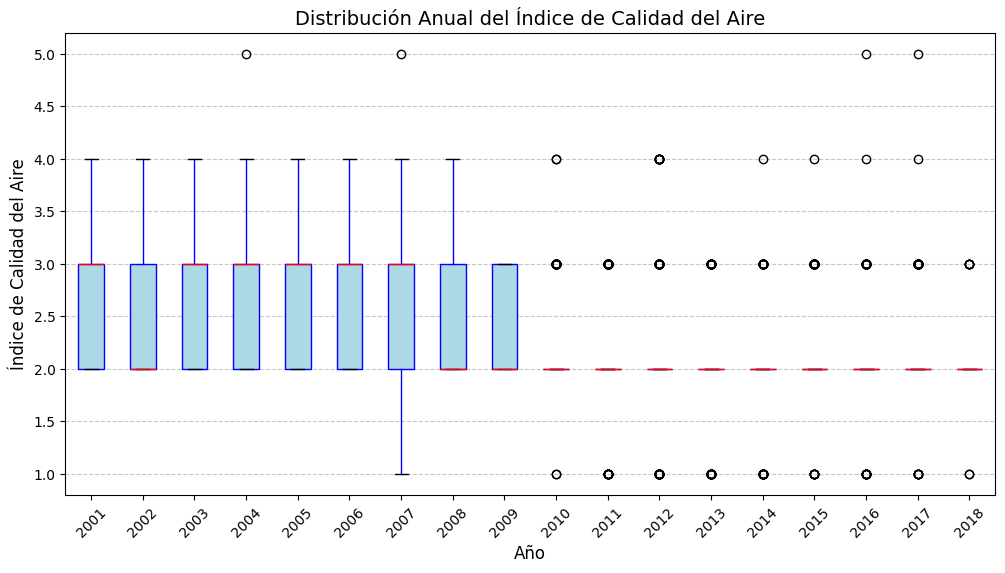

In [10]:
# Añadir una columna para el año
peor_estacion_diaria["año"] = peor_estacion_diaria["day"].dt.year

# Crear el diagrama de cajas
plt.figure(figsize=(12, 6))

# Generar datos para cada año
años = sorted(peor_estacion_diaria["año"].unique())
datos_por_año = [peor_estacion_diaria[peor_estacion_diaria["año"] == año]["Índice_Calidad_Estación"].dropna().values for año in años]

# Crear el diagrama de cajas
plt.boxplot(datos_por_año, tick_labels=años, patch_artist=True, showfliers=True, 
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"), whiskerprops=dict(color="blue"))

# Personalizar el gráfico
plt.title("Distribución Anual del Índice de Calidad del Aire", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Índice de Calidad del Aire", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


### Tendencias observadas

**En los años 2001-2007:** 
La calidad del aire tiene una distribución más amplia, con cajas más altas y bigotes más largos que el resto de años, lo que indica mayor variabilidad en la calidad del aire en estos años. Habiendo también algunos valores que se salen de lo típico en estos años.

**En 2008-2010:**
Las cajas muestran una tendencia a ser más compactas, lo que podría indicar mayor estabilidad en los valores o menor cantidad de datos.

**A partir de 2011:**
Parece haber una notable disminución en la calidad medida por el índice (1-5), lo que puede deberse a varios factores, como, de nuevo, la falta de datos.


### Puntos a tener en cuenta

La presencia de tantos puntos atípicos en varios años, especialmente en los últimos, merece más análisis. Podrían deberse a cambios en el sistema de monitoreo, errores en los datos, falta de datos o días específicos de alta o de baja contaminación.